In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore

In [2]:
df = pd.read_csv("./IMDB_Dataset.csv")

In [3]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [4]:
''' 
01. Cleaning:
    - all character in lowercase
    - remove leading and trailing spaces
    - remove html tags
    - removes url
    - expanding abbreviation (you'll -> you will, does't -> does not)
    - spell correction 
    - remove punctuation (!, ?) 
    - remove special character

02. Preprocessing:
    - tokenization (smallest possible part)
    - stop-word removal (and, I, have, could)
    - stemming (base form) -> dance, danced, dancing (dance)

03. EDA: 

04. Make some features: 
    - No of words

05. Vectorization:
    - Text to number (convert everything in number) --> (Bag of words, Tf Idf, Word2vec, textblob)

06. Modeling
07. Evaluation
08. Deploy
09. Monitoring

'''

" \n01. Cleaning:\n    - all character in lowercase\n    - remove leading and trailing spaces\n    - remove html tags\n    - removes url\n    - expanding abbreviation (you'll -> you will, does't -> does not)\n    - spell correction \n    - remove punctuation (!, ?) \n    - remove special character\n\n02. Preprocessing:\n    - tokenization (smallest possible part)\n    - stop-word removal (and, I, have, could)\n    - stemming (base form) -> dance, danced, dancing (dance)\n\n03. EDA: \n\n04. Make some features: \n    - No of words\n\n05. Vectorization:\n    - Text to number (convert everything in number) --> (Bag of words, Tf Idf, Word2vec, textblob)\n\n06. Modeling\n07. Evaluation\n08. Deploy\n09. Monitoring\n\n"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# -------------------- all char in lower case

df['review'] = df['review'].str.lower()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [9]:
# ----------------- remove all white space

df['review'] = df['review'].str.strip()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [10]:
# ---------------------- remove all html tags

import re
def remove_html(data):
    data = re.sub(r'<.*?>', '', data)
    return data

remove_html('<h1> This is h1 tag </h1> and now </br> i am using break')
remove_html('<h1>This is h1 tag</h1> and now</br> i am using break').strip()


'This is h1 tag and now i am using break'

In [11]:
# R - 01
df['review'] = df['review'].apply(remove_html)

# R - 02
df['review'] = df['review'].str.replace(r'<.*?>','')

In [12]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [13]:
# ------------------- Remove url

# R - 01
def remove_url(data):
    data = re.sub(r"https?://\S+|www\.\S+",'',data)
    return data

# R - 02
df['review'].str.replace(r"https?://\S+|www\.\S+",'')

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [14]:
# is there any url or not
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[1].values

array(["following directly from where the story left off in part one, the second half which sets about telling the inevitable downfall and much more grim side of the man's legacy is exactly as such. in direct contrast to the first feature, part two represents a shift from che the pride and glory of a revolutionised country, to che\x97struggling liberator of a country to which he has no previous ties. the change of setting isn't just aesthetic; from the autumn and spring greys of the woodlands comes a change of tone and heart to the feature, replacing the optimism of the predecessor with a cynical, battered and bruised reality aligned to an all new struggle. yet, as che would go on to say himself\x97such a struggle is best told exactly as that\x97a struggle. while part one certainly helped document that initial surge to power that the revolutionary guerrilla acquired through just that, part two takes a much more refined, callous and bleak segment of che's life and ambition, and gives it

In [15]:
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'')

In [16]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [17]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [18]:
# -------------------------- expanding abbreviation

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [19]:
remove_abb("i don't know i can't tell you the truth")

'i do not know i cannot tell you the truth'

In [20]:
df['review'] = df['review'].apply(remove_abb)

In [21]:
# ------------------------- spelling correction

from textblob import TextBlob # type: ignore

text = "hi I can drve at nigt"
TextBlob(text).correct().string

'hi I can drove at night'

In [22]:
# def spelling_correction(text):
#     return TextBlob(text).correct().string

In [23]:
# from autocorrect import Speller # type: ignore

# spell = Speller(lang='en')

# def spelling_correction(text):
#     return spell(text)

# text = "Ths is an exmple of spleling correction"

In [24]:
# df['review'].apply(spelling_correction)

In [25]:
# ------------------- Remove punctuations

import string
string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i, "")
    return text

In [27]:
remove_punctuation("e kemon !#$%&i am \'(not )*a +,-pun .a/c:r;e<w=>?@[\\] kotha ")

'e kemon i am not a pun acrew kotha '

In [28]:
df['review'] = df['review'].apply(remove_punctuation)

In [29]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


In [30]:
# ---------------------- remove all special character

# replace '[^\w\s]' with ''

In [31]:
# ------------------------- tokenizations (make every word separate with ,)
import nltk

from nltk.tokenize import word_tokenize
df['tokenized_review'] = df['review'].apply(word_tokenize)

In [32]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [33]:
# -------------------- remove stop word (is, the, from.......)

from nltk.corpus import stopwords

In [34]:
stopwords.words('english')
len(stopwords.words('english'))


179

In [35]:
# This will take lots of time use list

def remove_stopwords(text):
    new_ls = []
    for word in text:
        if word not in stopwords.words('english'):
            new_ls.append(word)
    return new_ls

In [36]:
remove_stopwords(['i', 'thought', 'this'])

['thought']

In [37]:
# df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

In [38]:
stop_words = set(stopwords.words('english'))

def remove_stopwords_optimized(text):
    return [word for word in text if word not in stop_words]

df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords_optimized)

In [39]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [40]:
df['new_review'] = df['tokenized_review'].apply(lambda x: " ".join(x))

In [41]:
df.head()

,review,sentiment,tokenized_review,new_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",one reviewers mentioned watching 1 oz episode ...
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,...",basically family little boy jake thinks zombie...
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...


In [42]:
df['char_len'] = df['new_review'].str.len()

In [43]:
df.head()

,review,sentiment,tokenized_review,new_review,char_len
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",one reviewers mentioned watching 1 oz episode ...,1142
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,656
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,592
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,...",basically family little boy jake thinks zombie...,440
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...,863


In [44]:
df['word_len'] = df['tokenized_review'].apply(len)

In [45]:
df.head()

,review,sentiment,tokenized_review,new_review,char_len,word_len
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",one reviewers mentioned watching 1 oz episode ...,1142,166
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,656,84
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,592,87
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,...",basically family little boy jake thinks zombie...,440,64
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...,863,125


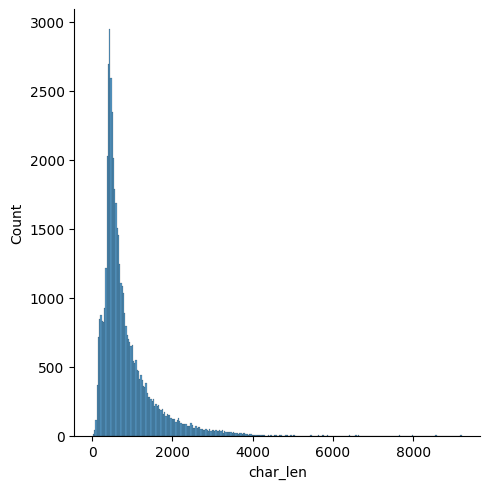

In [46]:
import seaborn as sns
sns.displot(df['char_len'])

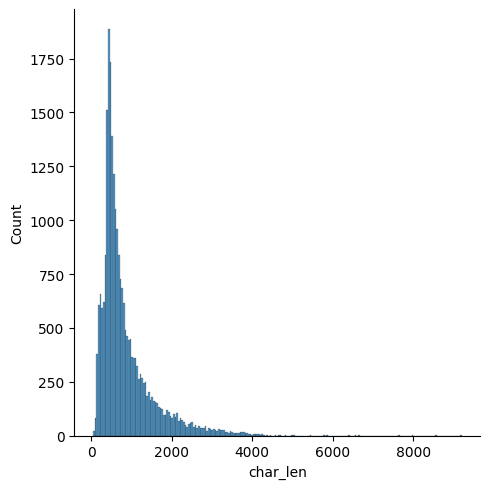

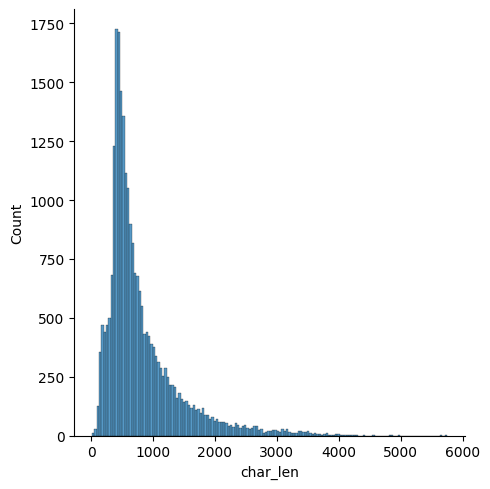

In [47]:
sns.displot(df[df['sentiment'] == 'positive']['char_len'])
sns.displot(df[df['sentiment'] == 'negative']['char_len'])

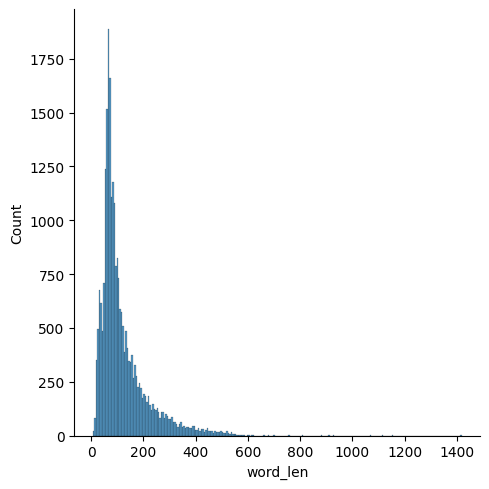

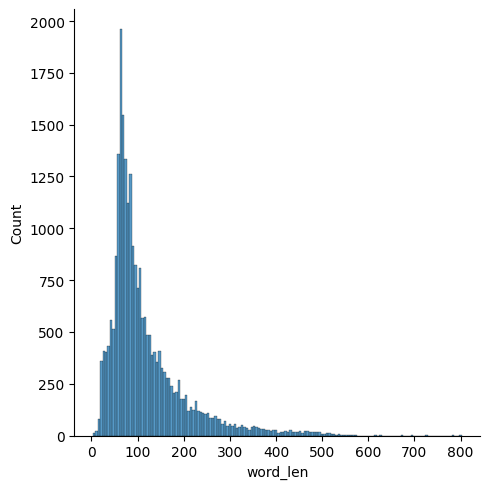

In [48]:
sns.displot(df[df['sentiment'] == 'positive']['word_len'])
sns.displot(df[df['sentiment'] == 'negative']['word_len'])

In [49]:
# ----------------------- unigram / bigram / trigram

''' 
hi i am anxious

unigram: hi, i, am, anxious
bigram: [hi i], [i am], [am anxious]
trigram: [hi i am], [i am anxious]
'''

' \nhi i am anxious\n\nunigram: hi, i, am, anxious\nbigram: [hi i], [i am], [am anxious]\ntrigram: [hi i am], [i am anxious]\n'

In [50]:
# df['tokenized_review'].sum()

In [51]:
# from nltk import ngrams
# pd.Series(ngrams(df['tokenized_review'].sum(),2)).value_counts()

In [52]:
from nltk import ngrams
from collections import Counter
from itertools import chain
from nltk.corpus import stopwords

# Preprocessing function to remove stopwords and convert to lowercase
def preprocess_tokens(tokens):
    stop_words = set(stopwords.words('english'))  # Set for faster lookups
    return [word.lower() for word in tokens if word.lower() not in stop_words]

# Apply preprocessing to the tokenized reviews
df['tokenized_review'] = df['tokenized_review'].apply(preprocess_tokens)

# Efficiently flatten the tokenized reviews and generate bigrams
bigram_counts = Counter(ngrams(chain.from_iterable(df['tokenized_review']), 2))

# Convert the counts to a pandas Series and sort
# bigram_series = pd.Series(bigram_counts).sort_values(ascending=False)
pd.Series(bigram_counts).sort_values(ascending=False)

ever       seen         2524
special    effects      2122
even       though       1850
one        best         1817
looks      like         1612
                        ... 
mccoy      yosemitei       1
yosemitei  would           1
rental     hardly          1
fan        needs           1
hearted    timid           1
Length: 3325149, dtype: int64

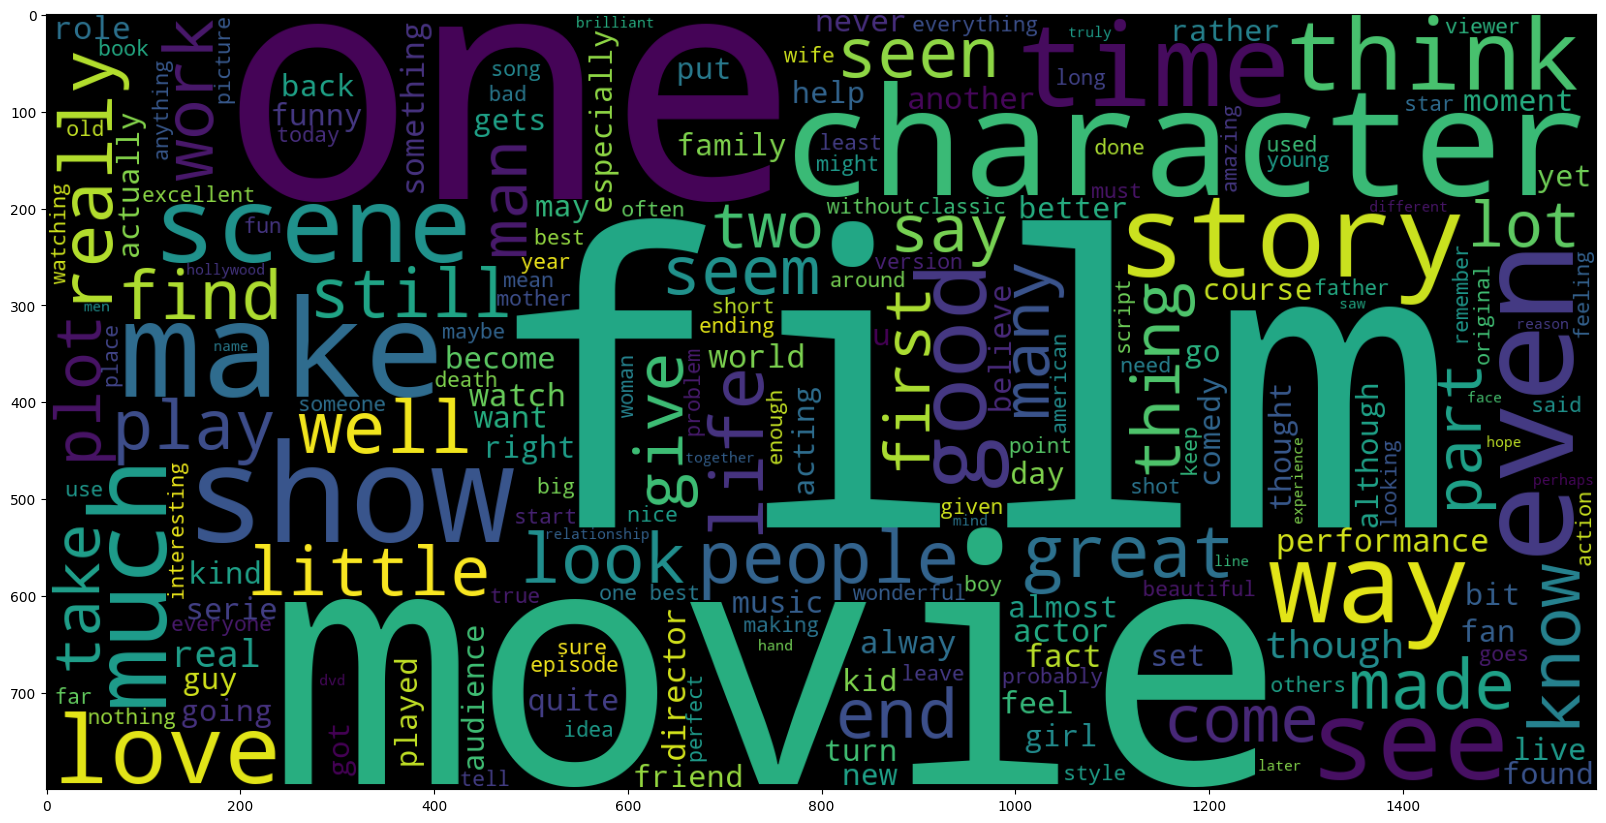

In [53]:
# ------------------------- Wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['new_review']))
plt.imshow(wc)

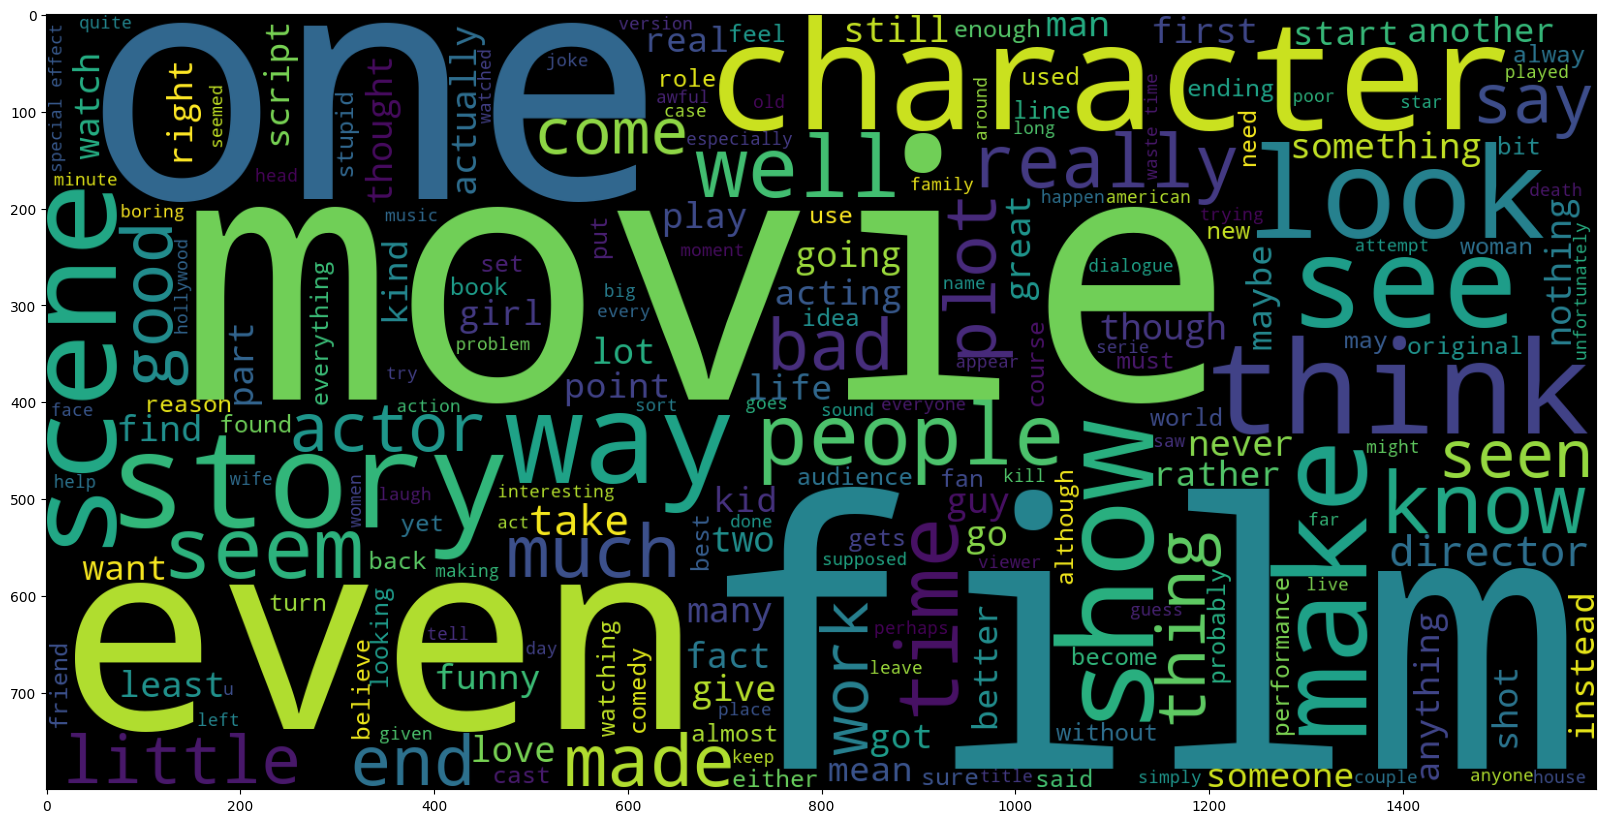

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['new_review']))
plt.imshow(wc)

In [55]:
# ----------------------- Bag of Word

from sklearn.feature_extraction.text import CountVectorizer # type: ignore

count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 3))

bag_of_words = count_vectorizer.fit_transform(df['new_review'])

bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())


In [56]:
bag_of_words.sample()

,10,10 10,10 minutes,10 years,100,1010,11,110,12,13,...,young boy,young girl,young man,young woman,younger,youth,zero,zombie,zombies,zone
41786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.decomposition import PCA # type: ignore

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

<Axes: >

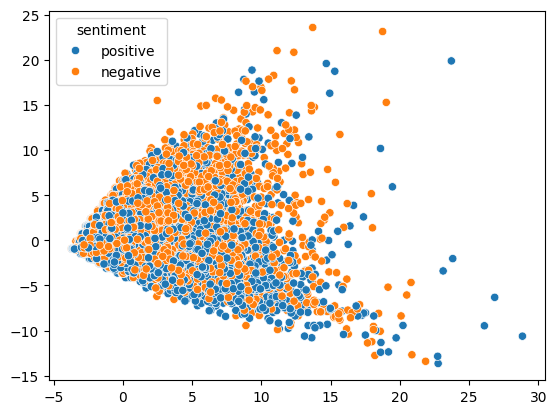

In [58]:
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['sentiment'])